In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd '/content/drive/MyDrive/Project_682'

Mounted at /content/drive/
/content/drive/MyDrive/Project_682


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading and Cleaning Metadata

In [ ]:
df = pd.read_csv('HAM10000_metadata.csv')

In [ ]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [ ]:
df.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
count,10015,10015,10015,10015,9958.000000,10015,10015,10015
unique,7470,10015,7,4,NaN,3,15,4
top,HAM_0003789,ISIC_0028066,nv,histo,NaN,male,back,vidir_molemax
freq,6,1,6705,5340,NaN,5406,2192,3954
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [ ]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64

In [ ]:
mean = int(df['age'].mean())
df['age'].fillna(mean,inplace=True)

In [ ]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

In [ ]:
lesion_type = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['lesion_type'] = df['dx'].map(lesion_type.get) 
df['lesion_type_idx'] = pd.Categorical(df['lesion_type']).codes

In [ ]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
imageid_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('', '*', '*.jpg'))}

In [ ]:
df['path'] = df['image_id'].map(imageid_path.get)

In [ ]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,lesion_type,lesion_type_idx,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,HAM10000/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,HAM10000/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,HAM10000/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,HAM10000/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,2,HAM10000/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,0,HAM10000/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,0,HAM10000/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,0,HAM10000/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,Actinic keratoses,0,HAM10000/ISIC_0032854.jpg


## Reading data saved after pre-processing

In [ ]:
import pickle

In [ ]:
file_name = "X_64.pkl"

open_file = open(file_name, "rb")
X = pickle.load(open_file)
open_file.close()

In [ ]:
X= np.array(X)

In [ ]:
X.shape

(26565, 64, 64, 3)

In [ ]:
X = X.astype(np.float64)

In [ ]:
X.dtype

dtype('float64')

In [ ]:
file_name = "y_64.pkl"

open_file = open(file_name, "rb")
y = pickle.load(open_file)
open_file.close()

#print(y)

In [ ]:
y = np.array(y)

In [ ]:
y.shape

(26565,)

In [ ]:
from keras.utils.np_utils import to_categorical

X = np.array(X)
y = np.array(y)

#y_train = to_categorical(y, num_classes=7)

## Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split

# split in 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


print('Train dataset shape',X_train.shape)
print('Test dataset shape',X_test.shape)

Train dataset shape (21252, 64, 64, 3)
Test dataset shape (5313, 64, 64, 3)


In [ ]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 20000
num_validation = 1252
num_test = 5313
num_dev = 252

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (20000, 64, 64, 3)
Train labels shape:  (20000,)
Validation data shape:  (1252, 64, 64, 3)
Validation labels shape:  (1252,)
Test data shape:  (5313, 64, 64, 3)
Test labels shape:  (5313,)


In [ ]:
import os
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt

%matplotlib inline

## CNN

In [ ]:
 # Set up some global variables
USE_GPU = True

if USE_GPU:
    device = '/device:GPU:0'
else:
    device = '/cpu:0'

# Constant to control how often we print when training models
print_every = 100

print('Using device: ', device)

Using device:  /device:GPU:0


In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [ ]:
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(64, 64, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.3)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

In [ ]:
# Define the optimizer
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
#X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
X_train = X_train.reshape(X_train.shape[0], *(64, 64, 3))
X_test = X_test.reshape(X_test.shape[0], *(64, 64, 3))
X_val = X_val.reshape(X_val.shape[0], *(64, 64, 3))
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(X_train)

In [ ]:
# Fit the model
epochs = 50
batch_size = 16
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

from tensorflow.keras.metrics import Recall
from sklearn.metrics import classification_report,confusion_matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
1250/1250 [==============================] - 39s 30ms/step - loss: 1.8537 - accuracy: 0.3397 - val_loss: 1.5953 - val_accuracy: 0.4185 - lr: 1.0000e-04
Epoch 2/50
1250/1250 [==============================] - 37s 30ms/step - loss: 1.5165 - accuracy: 0.4319 - val_loss: 1.5001 - val_accuracy: 0.4633 - lr: 1.0000e-04
Epoch 3/50
1250/1250 [==============================] - 37s 30ms/step - loss: 1.4313 - accuracy: 0.4645 - val_loss: 1.3659 - val_accuracy: 0.4776 - lr: 1.0000e-04
Epoch 4/50
1250/1250 [==============================] - 37s 30ms/step - loss: 1.3382 - accuracy: 0.4888 - val_loss: 1.3004 - val_accuracy: 0.4952 - lr: 1.0000e-04
Epoch 5/50
1250/1250 [==============================] - 37s 30ms/step - loss: 1.2801 - accuracy: 0.5080 - val_loss: 1.2190 - val_accuracy: 0.5192 - lr: 1.0000e-04
Epoch 6/50
1250/1250 [==============================] - 37s 30ms/step - loss: 1.2272 - accuracy: 0.5256 - val_loss: 1.2101 - val_accuracy: 0.5415 - lr: 1.0000e-04
Epoch 7/50
1250/1250 [

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(X_val, y_val, verbose=1)
loss_t, accuracy_t = model.evaluate(X_train, y_train, verbose=1)
print("Train: accuracy = %f  ;  loss_t = %f" % (accuracy_t, loss_t))
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("CNN1_Vini.h5")

625/625 [==============================] - 5s 5ms/step - loss: 0.7652 - accuracy: 0.7017
Train: accuracy = 0.701750  ;  loss_t = 0.765245
Validation: accuracy = 0.683706  ;  loss_v = 0.830473
Test: accuracy = 0.689065  ;  loss = 0.843487


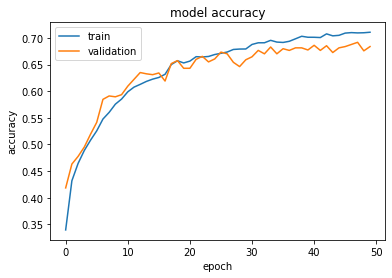

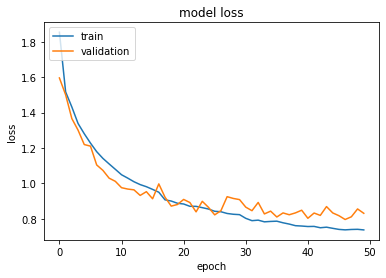

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from keras import models   
model = models.load_model('CNN1_Vini.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
train_pred = model.predict(X_train)
train_pred_classes = np.argmax(train_pred,axis = 1)
test_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
test_pred_classes = np.argmax(test_pred,axis = 1) 

confusionmatrix = confusion_matrix(y_test, test_pred_classes)
confusionmatrix

array([[ 116,   16,  200,    1,    8,   87,    0],
       [  33,  354,  186,   11,   13,   63,    1],
       [   5,   13, 1056,    4,   35,  168,    3],
       [   9,    6,   58,   41,   11,   11,    0],
       [   3,    5,  140,    3,  946,  203,    4],
       [   2,    8,  255,    0,   71,  988,    0],
       [   0,    6,    1,    0,    3,    6,  160]])

In [ ]:
classes=[0,1,2,3,4,5,6]

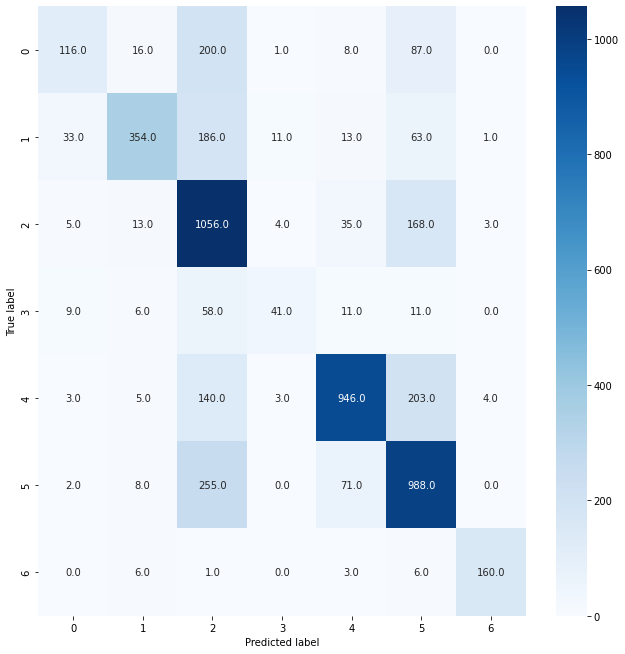

In [ ]:
figure = plt.figure(figsize=(9,9))
sns.heatmap(confusionmatrix.astype('int'), annot=True,cmap=plt.cm.Blues, fmt=".1f")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
labels = lesion_type.keys()
# Generate a classification report
trainreport = classification_report(y_train, train_pred_classes, target_names=list(labels))
testreport = classification_report(y_test, test_pred_classes, target_names=list(labels))

print(trainreport)
print(testreport)

              precision    recall  f1-score   support

          nv       0.67      0.28      0.39      1435
         mel       0.87      0.58      0.69      2294
         bkl       0.58      0.82      0.68      4990
         bcc       0.74      0.30      0.43       523
       akiec       0.88      0.71      0.79      5085
        vasc       0.66      0.76      0.71      5041
          df       0.98      0.93      0.95       632

    accuracy                           0.70     20000
   macro avg       0.77      0.63      0.66     20000
weighted avg       0.73      0.70      0.70     20000

              precision    recall  f1-score   support

          nv       0.69      0.27      0.39       428
         mel       0.87      0.54      0.66       661
         bkl       0.56      0.82      0.66      1284
         bcc       0.68      0.30      0.42       136
       akiec       0.87      0.73      0.79      1304
        vasc       0.65      0.75      0.69      1324
          df       0.95 